In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [7]:
# Load files 2018,2019,2020 and 2021
da18 = pd.read_excel('2018.xlsx')
da19 = pd.read_excel('2019.xlsx')
da20 = pd.read_excel('2020.xlsx')
da21 = pd.read_excel('2021.xlsx')

In [8]:
# Format date type
da18['End Date'] = pd.to_datetime(da18['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da19['End Date'] = pd.to_datetime(da19['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da20['End Date'] = pd.to_datetime(da20['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da21['End Date'] = pd.to_datetime(da21['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)


In [9]:
# Rename conductor feedback
da18.rename(columns = {'Are there any other comments you would like to make about the value of the Choir to you?':'conductorfeedback'},inplace = True)
da19.rename(columns = {'3.Is there anything that you particularly like about the choir?':'conductorfeedback'},inplace = True)
da20.rename(columns = {'Do you have any feedback for us about our live sessions?':'conductorfeedback'},inplace = True)
da21.rename(columns = {'9. What is the best thing about the choir? ___________':'conductorfeedback'},inplace = True)

In [10]:
mod_18 = da18.dropna( how='any',subset=['conductorfeedback'])
mod_19 = da19.dropna( how='any',subset=['conductorfeedback'])
mod_20 = da20.dropna( how='any',subset=['conductorfeedback'])
mod_21 = da21.dropna( how='any',subset=['conductorfeedback'])

In [11]:
# Create a new dataframe include conductor feedback and End date
a18 = mod_18.loc[:,['End Date','conductorfeedback']]
a19 = mod_19.loc[:,['End Date','conductorfeedback']]
a20 = mod_20.loc[:,['End Date','conductorfeedback']]
a21 = mod_21.loc[:,['End Date','conductorfeedback']]

In [12]:
# Convert date into year
a18['End Date'] = a19['End Date'].dt.year
a19['End Date'] = a19['End Date'].dt.year
a20['End Date'] = a20['End Date'].dt.year
a21['End Date']= a21['End Date'].dt.year

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nickn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# 2018
a18['scores'] = a18['conductorfeedback'].apply(lambda conductorfeedback: sid.polarity_scores(conductorfeedback))
a18.head()

,End Date,conductorfeedback,scores
0,2019.0,"Nothing too particular, though it's worth reit...","{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'comp..."
1,2019.0,Lydia has been one of the best things to happe...,"{'neg': 0.052, 'neu': 0.687, 'pos': 0.261, 'co..."
4,2019.0,"Good people, fantastic conductors.","{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp..."
6,2019.0,No.,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
8,2019.0,Please note that we are volunteers who work at...,"{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou..."


In [15]:
a18['compound']  = a18['scores'].apply(lambda score_dict: score_dict['compound'])
a18.head()

,End Date,conductorfeedback,scores,compound
0,2019.0,"Nothing too particular, though it's worth reit...","{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'comp...",0.9883
1,2019.0,Lydia has been one of the best things to happe...,"{'neg': 0.052, 'neu': 0.687, 'pos': 0.261, 'co...",0.9981
4,2019.0,"Good people, fantastic conductors.","{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.7579
6,2019.0,No.,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.2960
8,2019.0,Please note that we are volunteers who work at...,"{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou...",0.8422


In [16]:
a18['comp_score'] = a18['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
a18.head()

,End Date,conductorfeedback,scores,compound,comp_score
0,2019.0,"Nothing too particular, though it's worth reit...","{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'comp...",0.9883,pos
1,2019.0,Lydia has been one of the best things to happe...,"{'neg': 0.052, 'neu': 0.687, 'pos': 0.261, 'co...",0.9981,pos
4,2019.0,"Good people, fantastic conductors.","{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.7579,pos
6,2019.0,No.,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.2960,neg
8,2019.0,Please note that we are volunteers who work at...,"{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou...",0.8422,pos


In [17]:
def count(tablename,column):
    poscompo = 0
    negcompo = 0
    for val in tablename[column]:
        if val == "pos":
            poscompo += 1
        else:
            negcompo += 1
    return poscompo,negcompo

In [18]:
print('The number of postive and negative sentiment of the conductor in 2018:' + str(count(tablename = a18, column = 'comp_score')))

The number of postive and negative sentiment of the conductor in 2018:(48, 12)


In [19]:
# 2019
a19['scores'] = a19['conductorfeedback'].apply(lambda conductorfeedback: sid.polarity_scores(conductorfeedback))
a19['compound']  = a19['scores'].apply(lambda score_dict: score_dict['compound'])
a19['comp_score'] = a19['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
print('The number of postive and negative sentiment of the conductor in 2019:' + str(count(tablename = a19, column = 'comp_score')))

The number of postive and negative sentiment of the conductor in 2019:(291, 9)


In [20]:
# 2020
a20['scores'] = a20['conductorfeedback'].apply(lambda conductorfeedback: sid.polarity_scores(conductorfeedback))
a20['compound']  = a20['scores'].apply(lambda score_dict: score_dict['compound'])
a20['comp_score'] = a20['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
print('The number of postive and negative sentiment of the conductor in 2020:' + str(count(tablename = a20, column = 'comp_score')))

The number of postive and negative sentiment of the conductor in 2020:(62, 10)


In [21]:
# 2021
a21['scores'] = a21['conductorfeedback'].apply(lambda conductorfeedback: sid.polarity_scores(conductorfeedback))
a21['compound']  = a21['scores'].apply(lambda score_dict: score_dict['compound'])
a21['comp_score'] = a21['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
print('The number of postive and negative sentiment in 2021:' + str(count(tablename = a21, column = 'comp_score')))

The number of postive and negative sentiment in 2021:(146, 0)


In [23]:
plot_data = pd.DataFrame({'year':[2018,2019,2020,2021],'positive':[48,291,62,146],'negative':[12,9,10,0]})
plot_data

,year,positive,negative
0,2018,48,12
1,2019,291,9
2,2020,62,10
3,2021,146,0


<AxesSubplot:title={'center':'The positive and negative sentiment of conductor through different years'}, xlabel='year'>

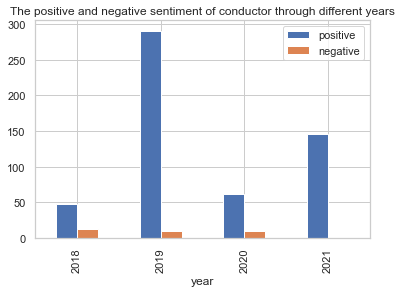

In [24]:
plot_data.plot(x="year", y=["positive", "negative"], kind="bar", title = 'The positive and negative sentiment of conductor through different years')

In [25]:
#  TOPIC MODELLING